In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer

In [4]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [5]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
df.dropna(inplace=True)

In [7]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [12]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
X_train.head()

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000


In [15]:
clf = DecisionTreeClassifier()

In [18]:
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

accuracy_score(y_test,y_pred)

0.6223776223776224

In [19]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6331181533646322

# BInning 

In [20]:
kbin_age = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')

In [22]:
trf1 = ColumnTransformer(transformers=[
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
],remainder='passthrough')

In [23]:
X_train_trf = trf1.fit_transform(X_train)
X_test_trf = trf1.fit_transform(X_test)

In [25]:
trf1.named_transformers_['first'].n_bins_

array([10])

In [27]:
trf1.named_transformers_['first'].bin_edges_

array([array([ 1. , 11. , 17. , 20.6, 24. , 28. , 30.1, 34.4, 38.6, 47.8, 62. ])],
      dtype=object)

In [30]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [33]:
output['age_label'] = pd.cut(x=X_train['Age'],bins=trf1.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_label'] = pd.cut(x=X_train['Fare'],bins=trf1.named_transformers_['second'].bin_edges_[0].tolist())

In [34]:
output

,age,age_trf,fare,fare_trf,age_label,fare_label
328,31.0,5.0,20.5250,5.0,"(30.1, 34.4]","(14.454, 22.62]"
73,26.0,4.0,14.4542,4.0,"(24.0, 28.0]","(10.5, 14.454]"
253,30.0,5.0,16.1000,5.0,"(28.0, 30.1]","(14.454, 22.62]"
719,33.0,6.0,7.7750,1.0,"(30.1, 34.4]","(7.743, 7.925]"
666,25.0,4.0,13.0000,4.0,"(24.0, 28.0]","(10.5, 14.454]"
...,...,...,...,...,...,...
92,46.0,8.0,61.1750,8.0,"(38.6, 47.8]","(57.783, 512.329]"
134,25.0,4.0,13.0000,4.0,"(24.0, 28.0]","(10.5, 14.454]"
337,41.0,7.0,134.5000,9.0,"(38.6, 47.8]","(57.783, 512.329]"
548,33.0,6.0,20.5250,5.0,"(30.1, 34.4]","(14.454, 22.62]"


In [35]:
clf = DecisionTreeClassifier()

clf.fit(X_train_trf,y_train)

y_pred = clf.predict(X_test_trf)

accuracy_score(y_test,y_pred)

0.6853146853146853

In [36]:
X_trf = trf1.fit_transform(X)

np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,y,cv=10,scoring='accuracy'))

0.682140062597809

In [57]:
def discretize(bins,startegy):
    kbin_age = KBinsDiscretizer(n_bins=bins,strategy=startegy,encode='ordinal')
    kbin_fare = KBinsDiscretizer(n_bins=bins,strategy=startegy,encode='ordinal')

    trf = ColumnTransformer(transformers=[
        ('age',kbin_age,[0]),
        ('fare',kbin_age,[1])
    ])

    X_ktrf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X_ktrf,y,cv=10,scoring='accuracy')))

    plt.figure(figsize=(14,4))
    plt.title('before')
    plt.subplot(121)
    plt.hist(X['Age'])
    
    plt.title('after')
    plt.subplot(122)
    plt.hist(X_ktrf[:,0],color='red')
    plt.show()    


    plt.figure(figsize=(14,4))
    plt.title('before')
    plt.subplot(121)
    plt.hist(X['Fare'])
    # plt.show()   
    
    plt.title('after')
    plt.subplot(122)
    plt.hist(X_ktrf[:,1],color='red')
    plt.show() 

0.6584702660406886


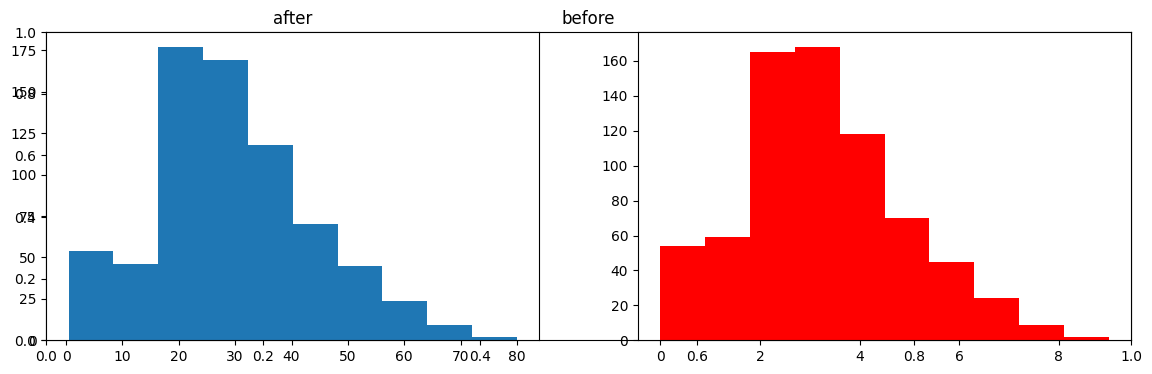

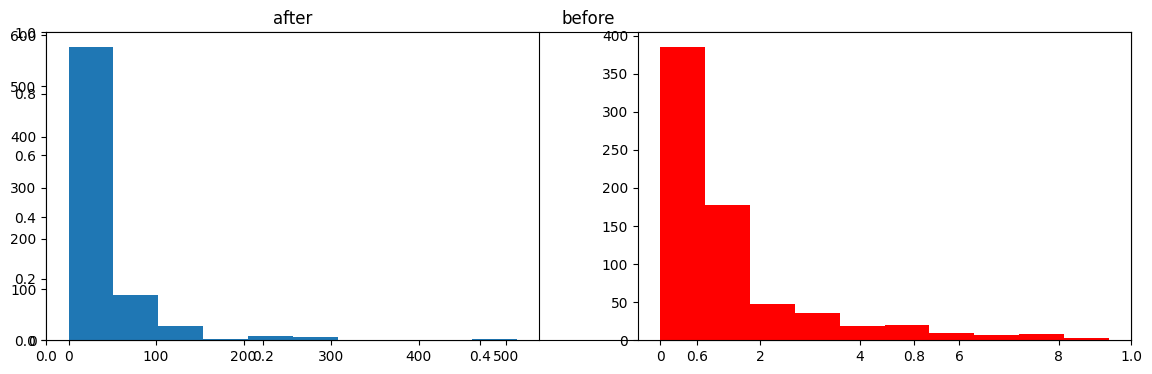

In [60]:
discretize(10,'kmeans')